In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import glob as gb
import numpy as np
import tensorflow as tn
import keras
from keras.layers import Conv2D , Dense ,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
trainpath='/kaggle/input/intel-image-classification/seg_train'

In [3]:
import os
import glob as gb

# Specify the base directory path
base_path = '/kaggle/input/multiple-sclerosis'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, 'Multiple Sclerosis')

# Get the list of folders in the 'seg_train' directory
folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")



For training data, found 761 in folder MS-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 1002 in folder Control-Axial


In [4]:
size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(687, 912, 4)        1
(543, 487, 4)        1
(606, 722, 4)        1
(515, 450, 4)        1
dtype: int64

In [5]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [6]:
import cv2

In [7]:
s = 150

In [8]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])



In [9]:
print(f'we have {len(x_train)} in x_train')

we have 3427 in x_train


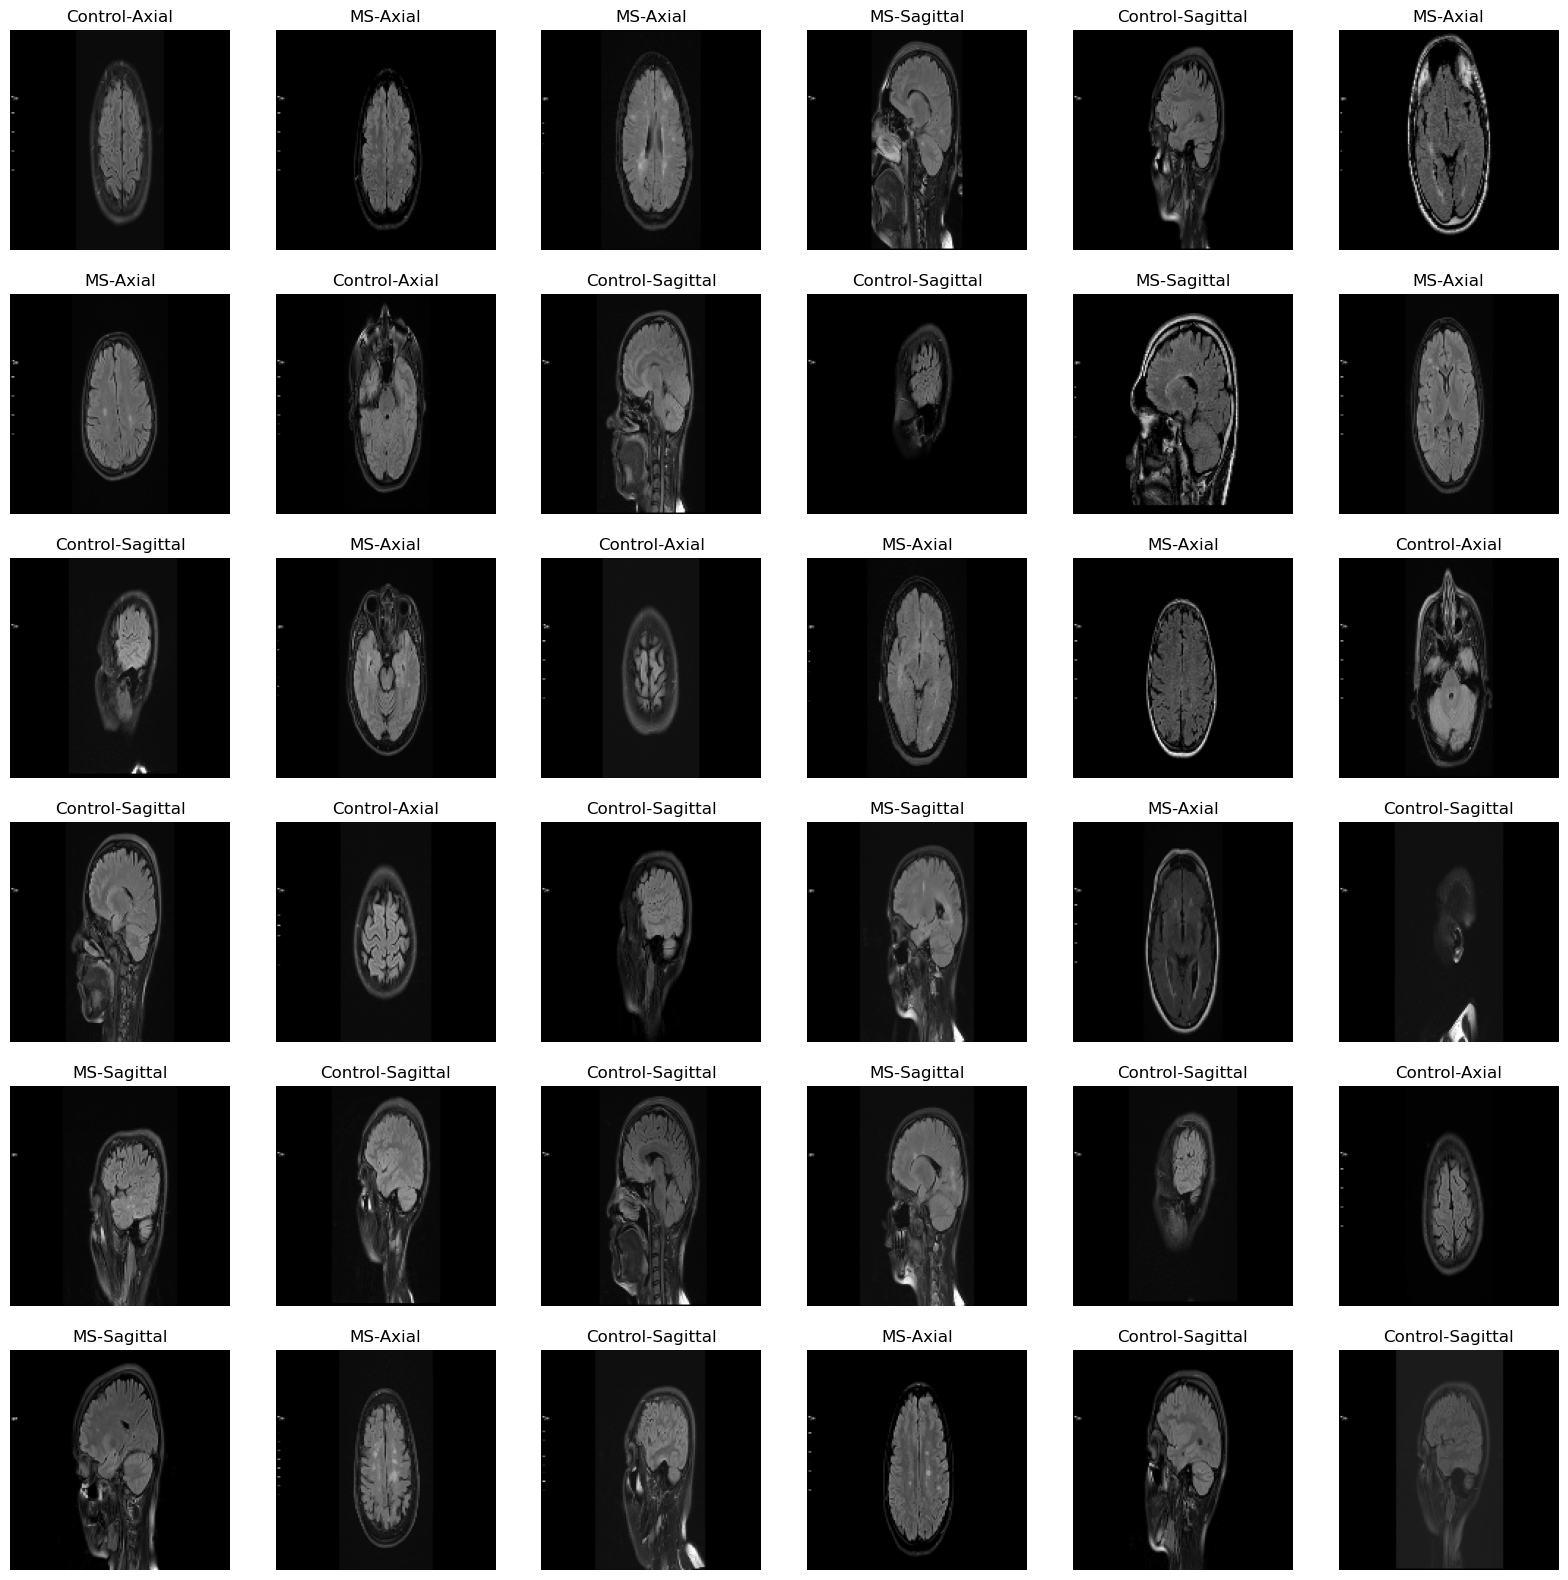

In [10]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [11]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


In [12]:
from keras.layers import MaxPooling2D,Dropout

In [14]:
# Continue from the previous code snippet

# Step 1: Data Preparation
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Step 2: Architecture Design
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(code), activation='softmax'))  # Output layer with the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this since labels are integers
              metrics=['accuracy'])

# Step 5: Training
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
86/86 [==============================] - 14s 36ms/step - loss: 0.7029 - accuracy: 0.6881 - val_loss: 0.3764 - val_accuracy: 0.8367
Epoch 2/10
86/86 [==============================] - 2s 24ms/step - loss: 0.3903 - accuracy: 0.8311 - val_loss: 0.2763 - val_accuracy: 0.8776
Epoch 3/10
86/86 [==============================] - 2s 23ms/step - loss: 0.3104 - accuracy: 0.8701 - val_loss: 0.2712 - val_accuracy: 0.8805
Epoch 4/10
86/86 [==============================] - 2s 24ms/step - loss: 0.2403 - accuracy: 0.8997 - val_loss: 0.1930 - val_accuracy: 0.9125
Epoch 5/10
86/86 [==============================] - 2s 23ms/step - loss: 0.2178 - accuracy: 0.9205 - val_loss: 0.1415 - val_accuracy: 0.9621
Epoch 6/10
86/86 [==============================] - 2s 23ms/step - loss: 0.1566 - accuracy: 0.9387 - val_loss: 0.1338 - val_accuracy: 0.9446
Epoch 7/10
86/86 [==============================] - 2s 25ms/step - loss: 0.1333 - accuracy: 0.9537 - val_loss: 0.1061 - val_accuracy: 0.9708
Epoch 8/10
8

In [15]:
# Step 6: Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print test accuracy

print("Test accuracy:", test_accuracy)

11/11 [==============================] - 0s 10ms/step - loss: 0.1083 - accuracy: 0.9563
Test accuracy: 0.9562682509422302


In [16]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming you have x_train, y_train, x_test, y_test prepared

# Data split
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Preprocess the image data
x_train_preprocessed = x_train / 255.0
x_val_preprocessed = x_val / 255.0
x_test_preprocessed = x_test / 255.0


# Define the base models
#s = 100  # Assuming you defined this earlier
base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(s, s, 3))
base_model_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(s, s, 3))

# Add custom top layers for classification
model_vgg16 = Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(128, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(len(code), activation='softmax'))

model_resnet50 = Sequential()
model_resnet50.add(base_model_resnet50)
model_resnet50.add(Flatten())
model_resnet50.add(Dense(128, activation='relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(len(code), activation='softmax'))

# Compile the models
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_resnet50.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the models
history_vgg16 = model_vgg16.fit(x_train_preprocessed, y_train, batch_size=32, epochs=10, validation_data=(x_val_preprocessed, y_val))
history_resnet50 = model_resnet50.fit(x_train_preprocessed, y_train, batch_size=32, epochs=10, validation_data=(x_val_preprocessed, y_val))

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
69/69 [==============================] - 31s 282ms/step - loss: 1.4010 - accuracy: 0.2851 - val_loss: 1.3760 - val_accuracy: 0.2847
Epoch 2/10
69/69 [==============================] - 14s 206ms/step - loss: 1.3740 - accuracy: 0.3061 - val_loss: 1.3760 - val_accuracy: 0.2847
Epoch 3/10
69/69 [==============================] - 14s 206ms/step - loss: 1.3723 - accuracy: 0.2956 - val_loss: 1.3721 - val_accuracy: 0.2847
Epoch 4/10
69/69 [==============================] - 14s 210ms/step - loss: 1.3764 - accuracy: 0.3016 - val_loss: 1.3753 - val_accuracy: 0.2847
Epoch 5/10
69/69 [==============================] - 15s 211ms/step - loss: 1.3723 - accuracy: 0.3038 - val_loss: 1.3730 - val_accuracy: 0.2847
Epoch 6/10
69/69 [==============================] - 15s 211ms/step - loss: 1.3728 - accuracy: 0.2911 - val_loss: 1.3726 - val_accuracy: 0.2847
Epoch 7/10
69/69 [==============================] - 15s 213ms/step - loss: 1.

In [17]:
# Evaluate the models
test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(x_test_preprocessed, y_test)
test_loss_resnet50, test_acc_resnet50 = model_resnet50.evaluate(x_test_preprocessed, y_test)

print(f"VGG16 Test accuracy: {test_acc_vgg16}")
print(f"ResNet50 Test accuracy: {test_acc_resnet50}")

9/9 [==============================] - 1s 129ms/step - loss: 2.1733 - accuracy: 0.2655
VGG16 Test accuracy: 0.2654545307159424
ResNet50 Test accuracy: 0.2654545307159424


In [18]:
model_resnet50.save('/kaggle/working/resnet_model.h5')

In [20]:
from keras.models import load_model

reconstructed_model = load_model("/kaggle/working/resnet_model.h5")

In [21]:
reconstructed_model.evaluate(x_test_preprocessed, y_test)

9/9 [==============================] - 2s 54ms/step - loss: 2.1733 - accuracy: 0.2655


[2.173325777053833, 0.2654545307159424]

In [22]:
model_vgg16.save('/kaggle/working/vgg_model.h5')

In [23]:
model.save('/kaggle/working/cnn_model.h5')